In [ ]:
import pandas as pd
import seaborn as sns

# Load CSV files
train_df = pd.read_csv("/root/CV_PJT/CV_PJT/data/data/train.csv")  # Contains 'ID' and 'target' columns
sample_submission = pd.read_csv("/root/CV_PJT/CV_PJT/code/ensemble/em_output/predictions_soft_voting_20241104_110321.csv")  # Template for submission
predictions_df = pd.read_csv("")  # File with 'ID' and predicted 'target' from your model


In [3]:
# Merging actual and predicted labels for comparison
test_results = pd.merge(sample_submission, predictions_df, on='ID', suffixes=('_true', '_pred'))
misclassified_df = test_results[test_results['target_true'] != test_results['target_pred']]
misclassified_ids = misclassified_df['ID'].tolist()

In [10]:
len(misclassified_ids)

92

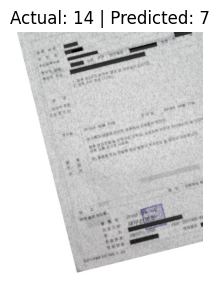

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory where test images are stored
test_images_dir = "/root/CV_PJT/CV_PJT/data/data/test"  # Change this to your actual test images directory

# Visualization function
def plot_misclassified_images(misclassified_df, test_images_dir, num_images=1):
    plt.figure(figsize=(12, num_images * 3))
    num_images = min(num_images, len(misclassified_df))  # Ensure not to exceed the list length

    for idx, row in enumerate(misclassified_df.itertuples()):
        if idx >= num_images:
            break

        # Load image
        img_path = os.path.join(test_images_dir, f"{row.ID}")
        img = mpimg.imread(img_path)

        # Plot image with actual and predicted labels
        plt.subplot(num_images, 1, idx + 1)
        plt.imshow(img)
        plt.title(f"Actual: {row.target_true} | Predicted: {row.target_pred}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run visualization with the top 10 misclassified images
plot_misclassified_images(misclassified_df, test_images_dir)


<Figure size 1000x800 with 0 Axes>

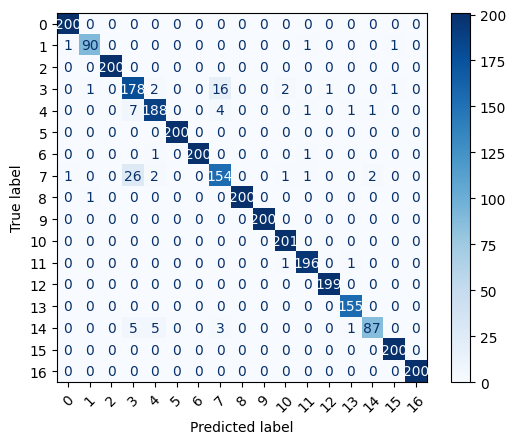

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
y_true = test_results['target_true']
y_pred = test_results['target_pred']
conf_matrix = confusion_matrix(y_true, y_pred, labels=range(17))  # 17 classes from 0 to 16

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=range(17))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()


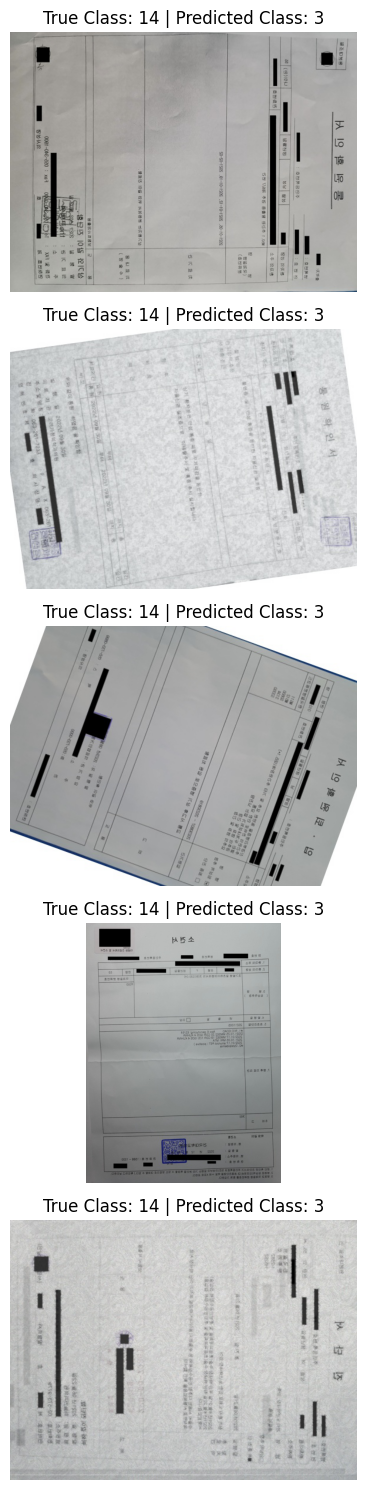

In [10]:
# Function to plot images with specific true and predicted classes
def plot_specific_misclassified_images(test_results, true_class, pred_class, test_images_dir):
    # Filter the DataFrame for specific true and predicted class
    specific_misclassified = test_results[(test_results['target_true'] == true_class) & 
                                          (test_results['target_pred'] == pred_class)]
    
    plt.figure(figsize=(12, len(specific_misclassified) * 3))  # Adjust figure size based on the number of images

    for idx, row in enumerate(specific_misclassified.itertuples()):
        # Load image
        img_path = os.path.join(test_images_dir, f"{row.ID}")
        img = mpimg.imread(img_path)

        # Plot image with actual and predicted labels
        plt.subplot(len(specific_misclassified), 1, idx + 1)
        plt.imshow(img)
        plt.title(f"True Class: {row.target_true} | Predicted Class: {row.target_pred}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Specify the true class and predicted class
true_class = 14
pred_class = 3

# Run the function
plot_specific_misclassified_images(test_results, true_class, pred_class, test_images_dir)

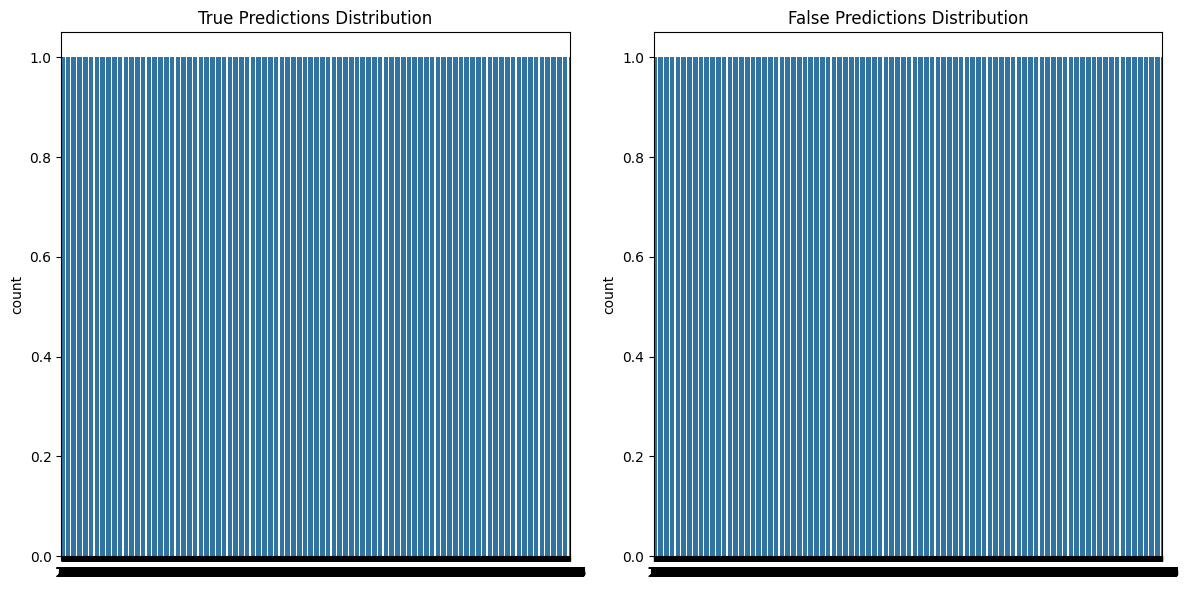

In [19]:
# 추가로 성능 시각화를 위한 코드
def plot_prediction_distribution():
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(test_results['target_true'])
    plt.title('True Predictions Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(test_results['target_pred'])
    plt.title('False Predictions Distribution')
    
    plt.tight_layout()
    plt.show()

plot_prediction_distribution()